<a href="https://colab.research.google.com/github/MuhammedAshraf2020/ImgaeSegmentationUsingKeras/blob/main/skin_lesion_segmentation_using_U_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import google.colab as gc
gc.files.upload()

Saving training_data.zip to training_data.zip


In [2]:

from  zipfile import ZipFile
file_name = "training_data.zip"

Zip = ZipFile(file_name , "r")

Zip.extractall()
print("Done")

Done


In [3]:
ls

sample_data/  training_data/  training_data.zip


In [4]:
cd training_data/

/content/training_data


In [5]:
DATA_PATH   = "image"
TARGET_PATH = "mask"

In [6]:
import os
import numpy as np
import cv2

In [7]:
cd image

/content/training_data/image


In [8]:
X = os.listdir()

In [9]:
cd ..

/content/training_data


In [10]:
cd mask

/content/training_data/mask


In [11]:
y = os.listdir()

In [12]:
cd ..

/content/training_data


In [13]:
Num_images = len(X)

In [14]:
Image_shape = cv2.imread("image/" + y[0]).shape

In [29]:
train = []
mask  = []

In [16]:
from skimage.transform import resize

In [30]:
for iter , id in enumerate(X):

  Path_data = DATA_PATH + "/" + id
  img_data  = cv2.imread(Path_data)
  train.append(img_data)
  
  Path_mask = TARGET_PATH + "/" + id
  img_mask  = resize(cv2.imread(Path_mask), (64 , 64 , 1))
  mask.append(img_mask)

In [31]:
train = np.array(train)
mask  = np.array(mask)

In [32]:
mask.shape

(2594, 64, 64, 1)

In [20]:
import matplotlib.pyplot as plt

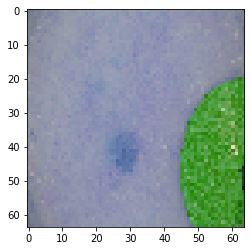

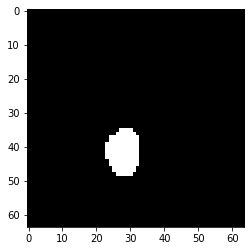

In [33]:
plt.imshow(train[20][: , : , :])
plt.show()
plt.imshow(mask[20][: , : , 0] , "gray")

In [45]:
from keras.models import * 
from keras.layers import *
s = Input((64 , 64 , 3))
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[s], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics="accuracy")

In [46]:
mask.shape

(2594, 64, 64, 1)

In [47]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
earlystopper = EarlyStopping(patience=10, verbose=1)
checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
results = model.fit(train , mask , validation_split=0.1 , batch_size=100 , epochs=50 , callbacks=[earlystopper, checkpointer])

Epoch 1/50
24/24 [==============================] - ETA: 0s - loss: 4.9397 - accuracy: 0.7225
Epoch 00001: val_loss improved from inf to 0.53579, saving model to model-dsbowl2018-1.h5
24/24 [==============================] - 2s 102ms/step - loss: 4.9397 - accuracy: 0.7225 - val_loss: 0.5358 - val_accuracy: 0.8277
Epoch 2/50
23/24 [===========================>..] - ETA: 0s - loss: 0.8217 - accuracy: 0.7702
Epoch 00002: val_loss improved from 0.53579 to 0.41950, saving model to model-dsbowl2018-1.h5
24/24 [==============================] - 2s 64ms/step - loss: 0.8206 - accuracy: 0.7702 - val_loss: 0.4195 - val_accuracy: 0.8561
Epoch 3/50
23/24 [===========================>..] - ETA: 0s - loss: 0.5395 - accuracy: 0.8203
Epoch 00003: val_loss improved from 0.41950 to 0.40228, saving model to model-dsbowl2018-1.h5
24/24 [==============================] - 2s 64ms/step - loss: 0.5385 - accuracy: 0.8207 - val_loss: 0.4023 - val_accuracy: 0.8521
Epoch 4/50
23/24 [===========================>..]

In [48]:
Masks = model.predict(train[:9] )

In [49]:
images=train[:10]

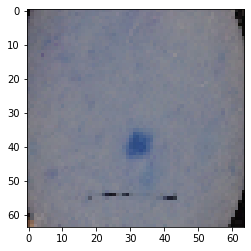

In [50]:
plt.imshow(images[0])

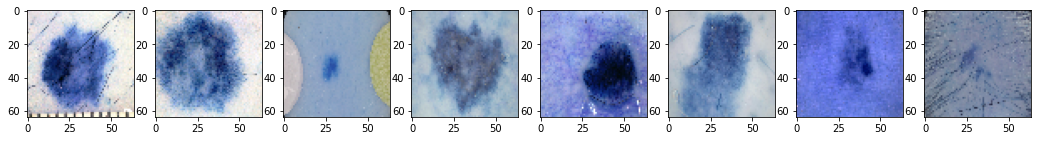

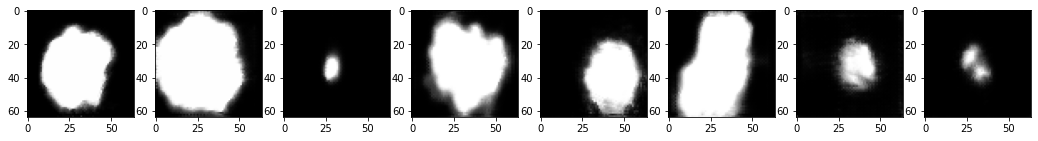

In [55]:
fig = plt.figure(figsize = (18 , 18))
for i  in range(1 , 9):
  fig.add_subplot(1 , 8 , i)
  plt.imshow(images[i])
plt.show()
fig = plt.figure(figsize = (18 , 18))
for i  in range(1 , 9):
  fig.add_subplot(1 , 8 , i)
  plt.imshow(Masks[i][: , : , 0 ] , "gray")
plt.show()
